**Plots at different times**

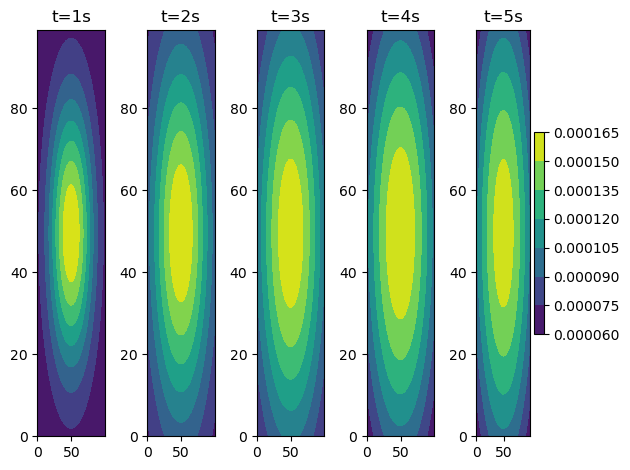

In [1]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np

# create arrays for our x and y values
x = np.linspace(-3,3,100)
y = np.linspace(-3,3,100)

# create a grid of (x,y) coordinates
X,Y=np.meshgrid(x,y)

# set some constants
A = 0.01
alpha = 1 

# create 5 axes
fig,axs = plt.subplots(1,5)

# plot on each axis at a different time t
for i in np.arange(1,6):
    Z = A/4/np.pi/alpha/i*np.exp(-(X**2+Y**2)/4/alpha/i)
    # don't want to worry about t=0s but index starts at 0 so use i-1
    cs = axs[i-1].contourf(Z) 
    axs[i-1].set_title(f't={i}s')

plt.colorbar(cs)
plt.tight_layout()
plt.show()

**Animated plot**

<IPython.core.display.Javascript object>


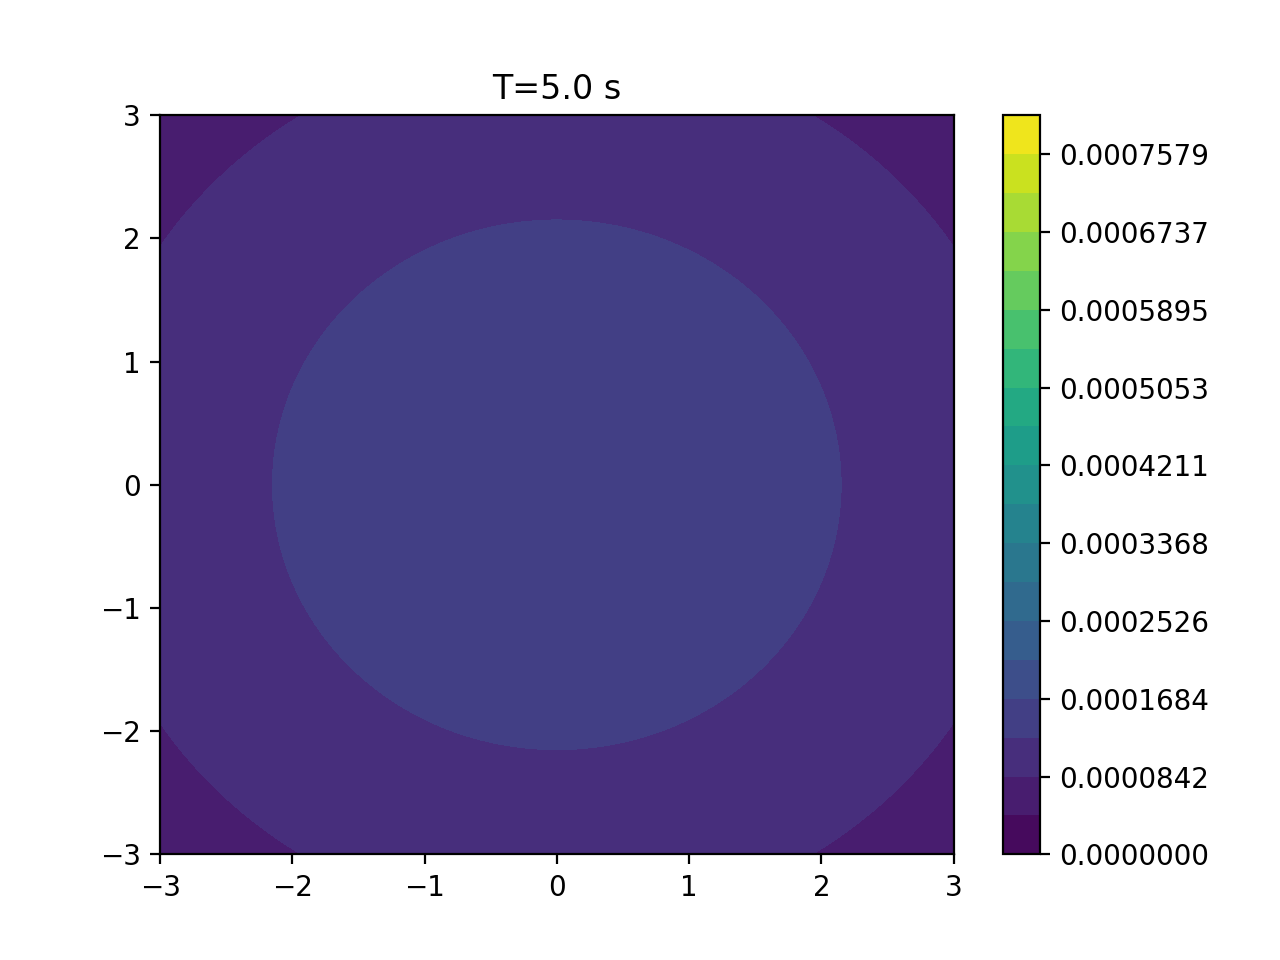

In [2]:
# Enable interactive plot
%matplotlib notebook

# reset Z
i = 1
Z = A/4/np.pi/alpha/i*np.exp(-(X**2+Y**2)/4/alpha/i)

# set up new axes, including a colourbar for all our time values
fig = plt.figure()
ax = plt.axes(xlim=(-3,3),ylim=(-3,3))
cvals = np.linspace(0,0.0008,20)
cont = plt.contourf(X,Y,Z,cvals) # plot first contour map as an object so we can call and change it
plt.colorbar()

# create an animtion function- this basically tells python what to update for each frame in the animation
def animate(frame):
    global cont # this lets us change the contour map referred to in the rest of the program, even though its in a function here
    Z = A/4/np.pi/alpha/frame*np.exp(-(X**2+Y**2)/4/alpha/frame)
    for c in cont.collections:
        c.remove() # this removes the previous contours
    cont = plt.contourf(X,Y,Z,cvals)
    plt.title(f'T={frame} s')
    return cont

# call the animation function
ani = FuncAnimation(fig,animate,frames=np.linspace(1,5,41),repeat=False)
plt.show()

This is a Gaussian which spreads out in time